<a href="https://colab.research.google.com/github/harshitgrover06/Malaria-Classification-Using-CNN/blob/master/Malaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/harshitgrover06/Malaria-Classification-Using-CNN.git

Cloning into 'Malaria-Classification-Using-CNN'...
remote: Enumerating objects: 27583, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 27583 (delta 0), reused 0 (delta 0), pack-reused 27577
Receiving objects: 100% (27583/27583), 331.67 MiB | 37.50 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Checking out files: 100% (27560/27560), done.


In [ ]:
import os
import numpy as np
import pandas as pd
from keras.layers import Dense
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPool2D,ZeroPadding2D
from tensorflow.keras  import optimizers
from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator


In [ ]:
width = 64
height = 64

In [ ]:
imagedata = ImageDataGenerator(rescale=1/255.0,validation_split=0.2)

In [ ]:
train_data_generator = imagedata.flow_from_directory(directory='/content/Malaria-Classification-Using-CNN/malaria-dataset',
                                                     target_size=(width,height),
                                                     class_mode='binary',
                                                     batch_size=16,
                                                     subset='training')

Found 22048 images belonging to 2 classes.


In [ ]:
validation_data_generator = imagedata.flow_from_directory(directory='/content/Malaria-Classification-Using-CNN/malaria-dataset',
                                                     target_size=(width,height),
                                                     class_mode='binary',
                                                     batch_size=16,
                                                     subset='validation')

Found 5510 images belonging to 2 classes.


In [ ]:
train_data_generator.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
validation_data_generator.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

**CNN Model**

In [ ]:
model = Sequential()
#adding layers in model
model.add(Conv2D(16,(3,3),input_shape=(width,height,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
#dropping 50%neurons randomly
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)             

In [ ]:
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])

In [27]:
history = model.fit_generator(generator=train_data_generator,epochs=5,validation_data=validation_data_generator,validation_steps=len(validation_data_generator))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
1378/1378 [==============================] - 136s 85ms/step - loss: 0.6420 - accuracy: 0.6202 - val_loss: 0.2831 - val_accuracy: 0.9138
Epoch 2/5
1378/1378 [==============================] - 115s 84ms/step - loss: 0.2733 - accuracy: 0.9162 - val_loss: 0.2016 - val_accuracy: 0.9316
Epoch 3/5
1378/1378 [==============================] - 115s 83ms/step - loss: 0.2023 - accuracy: 0.9319 - val_loss: 0.1972 - val_accuracy: 0.9381
Epoch 4/5
1378/1378 [==============================] - 115s 84ms/step - loss: 0.1878 - accuracy: 0.9392 - val_loss: 0.1741 - val_accuracy: 0.9428
Epoch 5/5
1378/1378 [==============================] - 116s 84ms/step - loss: 0.1764 - accuracy: 0.9422 - val_loss: 0.1886 - val_accuracy: 0.9399


In [28]:
history.history

{'accuracy': [0.7147586941719055,
  0.9209905862808228,
  0.9344611763954163,
  0.9406295418739319,
  0.9442579746246338],
 'loss': [0.5460768342018127,
  0.25291404128074646,
  0.20012876391410828,
  0.18743573129177094,
  0.17670346796512604],
 'val_accuracy': [0.9137930870056152,
  0.9315789341926575,
  0.9381124973297119,
  0.9428312182426453,
  0.9399273991584778],
 'val_loss': [0.28313717246055603,
  0.20157787203788757,
  0.1971624344587326,
  0.17407424747943878,
  0.18861456215381622]}

In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)             

In [38]:
print("Accuracy of model :",history.history['val_accuracy'][-1])

Accuracy of model : 0.9399273991584778


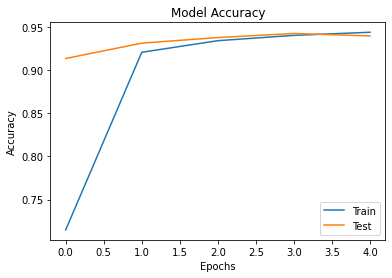

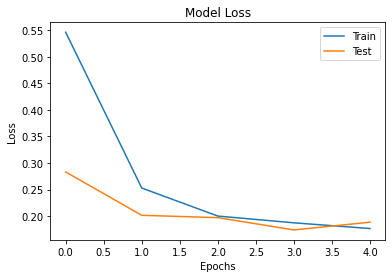

In [39]:
# Plot the model accuracy vs. number of Epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'])
plt.show()

# Plot the Loss function vs. number of Epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'])
plt.show()

In [42]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

f = open('malaria_model.tflite', "wb")
f.write(tflite_model)
f.close()

INFO:tensorflow:Assets written to: /tmp/tmpa27f7a82/assets


INFO:tensorflow:Assets written to: /tmp/tmpa27f7a82/assets


In [43]:
try:
  files.download('malaria_model.tflite')
except ImportError:
  print('TF Lite model:', os.path.join(os.getcwd(), 'malaria_model.tflite'))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>